In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv('Salary_Data.csv')
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


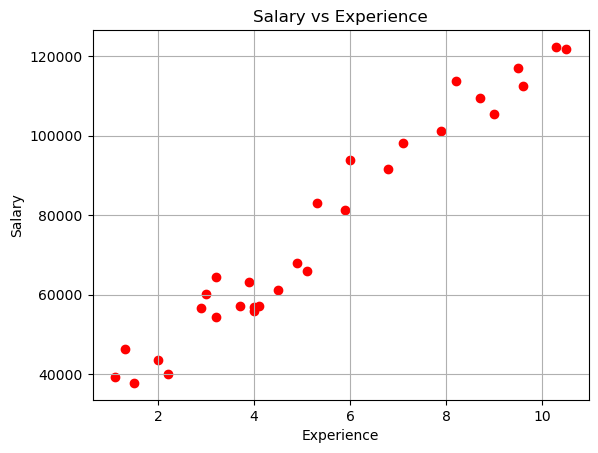

In [7]:
plt.title('Salary vs Experience')
plt.xlabel('Experience')
plt.ylabel('Salary')
plt.scatter(df['YearsExperience'], df['Salary'], color = 'red')
plt.grid()

In [26]:
df.shape

(30, 2)

In [13]:
# separate the data
x = df[['YearsExperience']].values  # input data
y = df['Salary']

In [19]:
x

array([[ 1.1],
       [ 1.3],
       [ 1.5],
       [ 2. ],
       [ 2.2],
       [ 2.9],
       [ 3. ],
       [ 3.2],
       [ 3.2],
       [ 3.7],
       [ 3.9],
       [ 4. ],
       [ 4. ],
       [ 4.1],
       [ 4.5],
       [ 4.9],
       [ 5.1],
       [ 5.3],
       [ 5.9],
       [ 6. ],
       [ 6.8],
       [ 7.1],
       [ 7.9],
       [ 8.2],
       [ 8.7],
       [ 9. ],
       [ 9.5],
       [ 9.6],
       [10.3],
       [10.5]])

#### cross validation

In [22]:
from sklearn.model_selection import train_test_split

In [24]:
x_train, x_test, y_train, y_test = train_test_split(x, y,
                                                   random_state= 0,
                                                   test_size = 0.25)

In [30]:
x_train.shape, y_train.shape

((22, 1), (22,))

In [34]:
y_train.ndim

1

In [32]:
x_test.shape, y_test.shape

((8, 1), (8,))

#### Build the model

In [39]:
# import the model
from sklearn.linear_model import LinearRegression

In [41]:
# create an object
reg = LinearRegression()

In [43]:
reg.fit(x_train, y_train)

LinearRegression()

#### Evaluate the model

In [46]:
# predict on test set

y_pred = reg.predict(x_test)

In [48]:
# compare the predicted and actual values

result = pd.DataFrame({
    'actual': y_test,
    'predicted': y_pred
})
result

,actual,predicted
2,37731.0,41056.257055
28,122391.0,123597.709384
13,57081.0,65443.504334
10,63218.0,63567.562235
26,116969.0,116093.940990
24,109431.0,108590.172597
27,112635.0,117031.912039
11,55794.0,64505.533285


In [50]:
reg.coef_

array([9379.71049195])

In [52]:
reg.intercept_

26986.691316737248

In [54]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(y_test, y_pred)

3508.5455930660555

In [58]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred)

22407940.143340684

In [60]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.9779208335417602

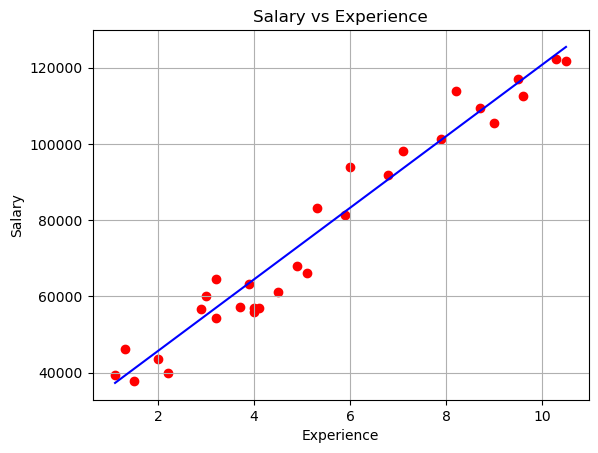

In [68]:
plt.title('Salary vs Experience')
plt.xlabel('Experience')
plt.ylabel('Salary')
plt.scatter(x, y, color = 'red')
plt.plot(x, reg.predict(x), color = 'blue')
plt.grid()